### Comparison between different algorithms without improvements

* Load the preprocessed data
* Select the desired sample size
* Use different ML algorithms
* Save results for comparison with improved versions
* Compare results via plot

In [5]:
# import all libraries used in "algorithm_comparisons.ipynb"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
# load "preprocessed_df.csv"
df = pd.read_csv("preprocessed_df.csv")

In [3]:
sample_size = 0.05  # change if necessary

# Zufällige Stichprobenauswahl
df_sample = df.sample(frac=sample_size, random_state=42)

# Teilen Sie die Stichprobe in Trainings- und Testsets
X_sample = df_sample.drop('income', axis=1)
y_sample = df_sample['income']

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [4]:
# mlp classifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, activation='relu', solver='adam', random_state=42)

# Training des Modells
mlp.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred_mlp_base = mlp.predict(X_test)

accuracy_mlp_baseline = accuracy_score(y_test, y_pred_mlp_base)
precision_mlp_baseline = precision_score(y_test, y_pred_mlp_base)
recall_mlp_baseline = recall_score(y_test, y_pred_mlp_base)
f1_mlp_baseline = f1_score(y_test, y_pred_mlp_base)

In [6]:
# XGBClassifier
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb_base = xgb.predict(X_test)


accuracy_xgb_baseline = accuracy_score(y_test, y_pred_xgb_base)
precision_xgb_baseline = precision_score(y_test, y_pred_xgb_base)
recall_xgb_baseline = recall_score(y_test, y_pred_xgb_base)
f1_xgb_baseline = f1_score(y_test, y_pred_xgb_base)

In [7]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_base = rf.predict(X_test)

accuracy_rf_baseline = accuracy_score(y_test, y_pred_rf_base)
precision_rf_baseline = precision_score(y_test, y_pred_rf_base)
recall_rf_baseline = recall_score(y_test, y_pred_rf_base)
f1_rf_baseline = f1_score(y_test, y_pred_rf_base)

In [14]:
# create dict to save all test results
test_results = {"Model": ["MLP", "XGB", "RF"],
                'Accuracy': [accuracy_mlp_baseline, accuracy_xgb_baseline, accuracy_rf_baseline],
                'Precision': [precision_mlp_baseline, precision_xgb_baseline, precision_rf_baseline],
                'Recall': [recall_mlp_baseline, recall_xgb_baseline, recall_rf_baseline],
                'F1-Score': [f1_mlp_baseline, f1_xgb_baseline, f1_rf_baseline]}

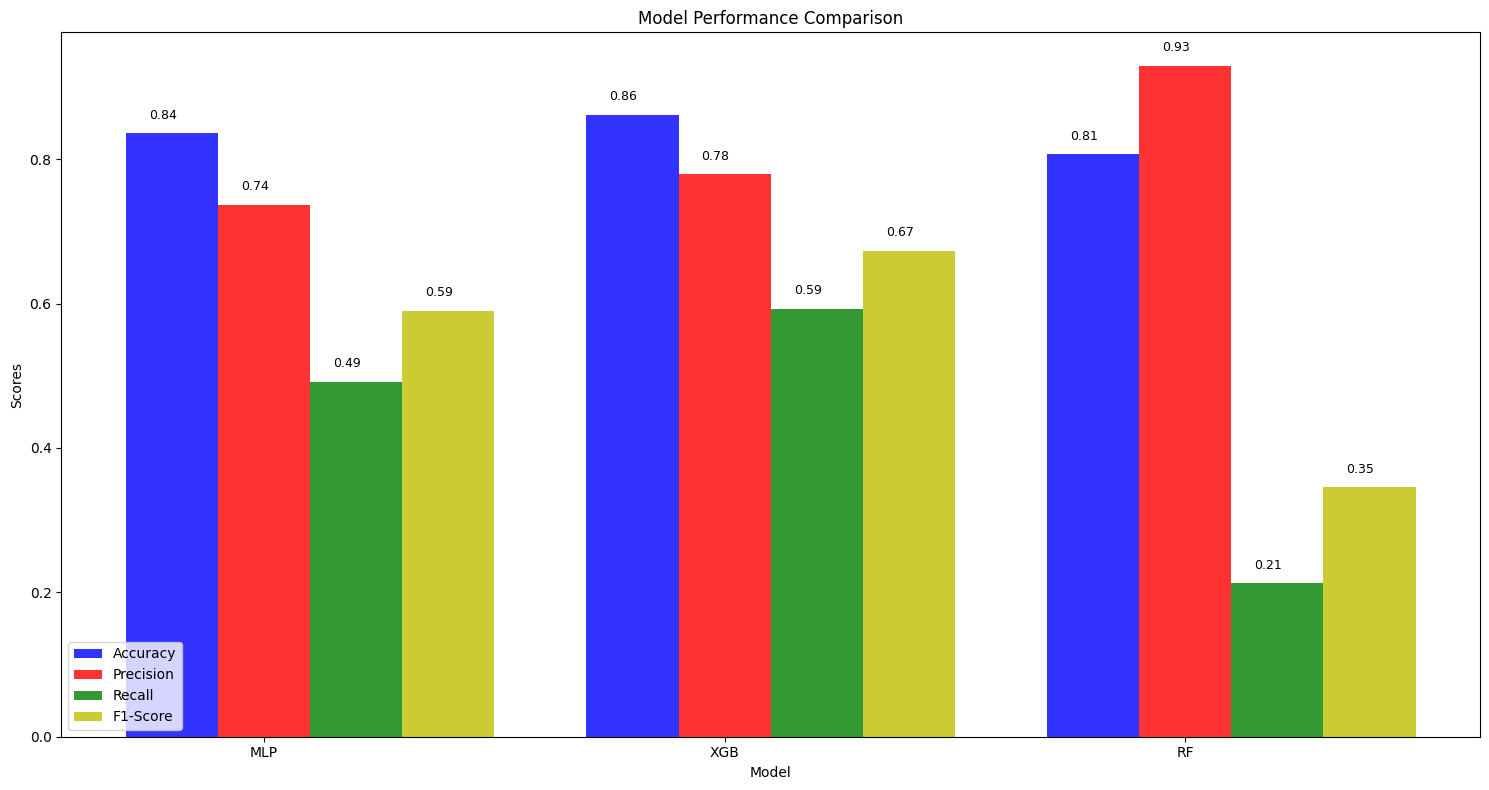

In [15]:
# draw plot
df = pd.DataFrame(test_results)

# Setze die Größe des Plots
plt.figure(figsize=(15, 8))

# Anzahl der Gruppen
n_groups = len(df)

# Erstelle den Balkendiagramm-Index
index = np.arange(n_groups)

# Balkenbreite
bar_width = 0.2

# Opazität der Balken
opacity = 0.8

# Erstelle Balken für jede Metrik
plt.bar(index, df['Accuracy'], bar_width, alpha=opacity, color='b', label='Accuracy')
plt.bar(index + bar_width, df['Precision'], bar_width, alpha=opacity, color='r', label='Precision')
plt.bar(index + 2 * bar_width, df['Recall'], bar_width, alpha=opacity, color='g', label='Recall')
plt.bar(index + 3 * bar_width, df['F1-Score'], bar_width, alpha=opacity, color='y', label='F1-Score')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, df['Model'])
#add legend to the plot in bottom left corner
plt.legend(loc='lower left')

# Optional: Füge Textlabels über jedem Balken hinzu
for i in index:
    plt.text(x=i - 0.05, y=df['Accuracy'][i] + 0.02, s=f"{df['Accuracy'][i]:.2f}", size=9)
    plt.text(x=i + bar_width - 0.05, y=df['Precision'][i] + 0.02, s=f"{df['Precision'][i]:.2f}", size=9)
    plt.text(x=i + 2 * bar_width - 0.05, y=df['Recall'][i] + 0.02, s=f"{df['Recall'][i]:.2f}", size=9)
    plt.text(x=i + 3 * bar_width - 0.05, y=df['F1-Score'][i] + 0.02, s=f"{df['F1-Score'][i]:.2f}", size=9)

plt.tight_layout()
plt.show()
